##  importing related package

In [1]:
# standard library
import os 
import pathlib    # object oriented filesystems paths which instantiates a concrete path for the platform the code is running on.
import os.path    # common pathname manipulations
import fileinput  # Iterate over lines from multiple input streams 
import stat       # Interpreting stat() results
import filecmp    # file and directory comparisions
import tempfile   # generate tempory file and directories
import glob       #  Unix style pathname pattern expansion
import itertools

# third parties library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns # provide high level interface for drawing attractive and informative statistical graphics


from sklearn.preprocessing import StandardScaler

In [2]:
import platform, psutil
print('System         :', platform.system())
print('Python Version :', platform.python_version())
print('Version tuple  :', platform.python_version_tuple())
print('Compiler       :', platform.python_compiler())
print('RAM            :', str(round(psutil.virtual_memory().total / (1024.0 **3)))+" GB")
print('Build          :', platform.python_build())


System         : Windows
Python Version : 3.7.3
Version tuple  : ('3', '7', '3')
Compiler       : MSC v.1915 64 bit (AMD64)
RAM            : 8 GB
Build          : ('default', 'Apr 24 2019 15:29:51')


## Importing dataset

In [3]:
data = pd.read_csv("./Dataset/creditcard.csv")
data.head(5)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
print(data.shape)

(284807, 31)


## To know whether any cell value is empty or not

In [5]:
#data.empty 
data.isnull().values.any()

False

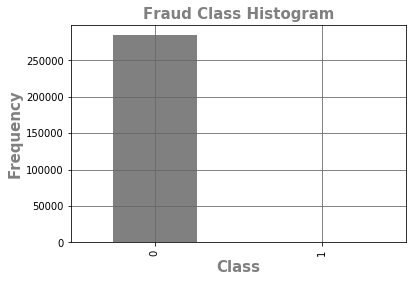

In [6]:
classes_count = pd.value_counts(data['Class'],sort = True).sort_index()
classes_count.plot(kind='bar', color = "Gray")
plt.title('Fraud Class Histogram', fontweight='bold', fontsize = '15', color = "gray")
plt.xlabel('Class', fontweight='bold', fontsize = '15', color = "gray")
plt.ylabel('Frequency', fontweight='bold', fontsize = '15', color = "gray")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.show()

In [7]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [8]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Classify Fradulent and Normal Transactions

In [9]:
fraud = data[data['Class'] == 1]
normal = data[data['Class'] == 0]
print('Fradulent transations     :', fraud.shape)
print('Normal(Valid) transaction :',normal.shape)

Fradulent transations     : (492, 31)
Normal(Valid) transaction : (284315, 31)


In [10]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [11]:
print(normal.Amount.describe()) 


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


## Graph to show relation between normal trasactions with respect to amount

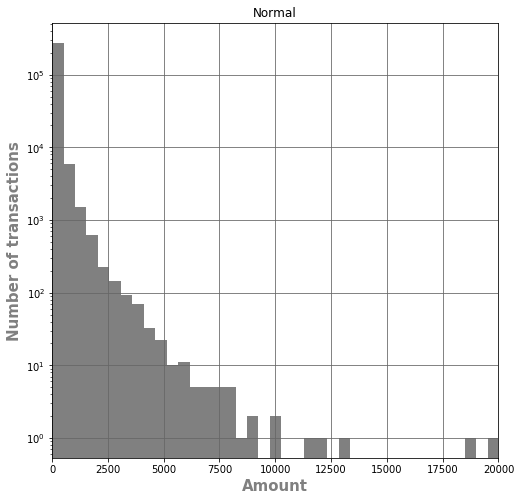

In [12]:
fig, axes1  = plt.subplots(sharex = True, figsize=(8,8))

bins = 50

axes1.hist(normal.Amount, bins = bins, color = 'Grey' )
axes1.set_title('Normal')

plt.xlabel('Amount', fontweight='bold', fontsize = '15', color = "gray")
plt.ylabel('Number of transactions', fontweight='bold', fontsize = '15', color = "gray")
plt.xlim(0,20000)
plt.yscale('log')
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.show()

In [13]:
print(fraud.Amount.describe())

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


## Graph to show relation between fraud trasactions with respect to amount

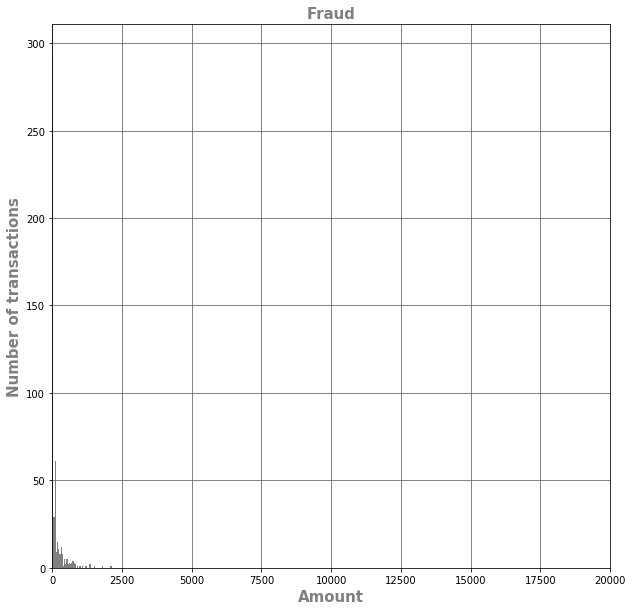

In [14]:
fig, axes1  = plt.subplots(sharex = True, figsize=(10,10) )

bins = 50

axes1.hist(fraud.Amount, bins = bins, color = 'Grey' )
axes1.set_title('Fraud', fontweight='bold', fontsize = '15', color = "gray")

plt.xlabel('Amount', fontweight='bold', fontsize = '15', color = "gray")
plt.ylabel('Number of transactions', fontweight='bold', fontsize = '15', color = "gray")
plt.xlim(0,20000)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.show()


In [15]:
normal.Time.describe()

count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64

## Graph of Normal transaction between Amount with respect to TIme

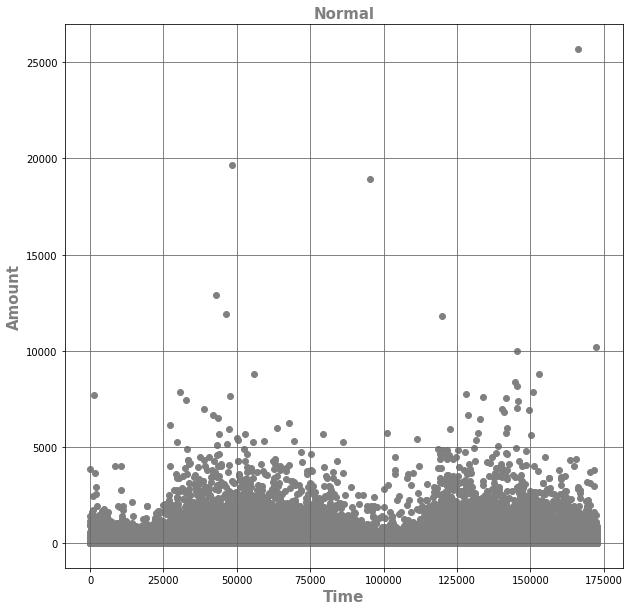

In [16]:
fig, axestime1  = plt.subplots(sharex = True, figsize=(10,10) )

axestime1.scatter(normal.Time, normal.Amount, color = 'Grey' )
axestime1.set_title('Normal', fontweight='bold', fontsize = '15', color = "gray" )

plt.xlabel('Time', fontweight='bold', fontsize = '15', color = "gray")
plt.ylabel('Amount', fontweight='bold', fontsize = '15', color = "gray")

plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.show()

In [17]:
fraud.Time.describe()

count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

## Graph of fraud transactions between Amount with respect to Time

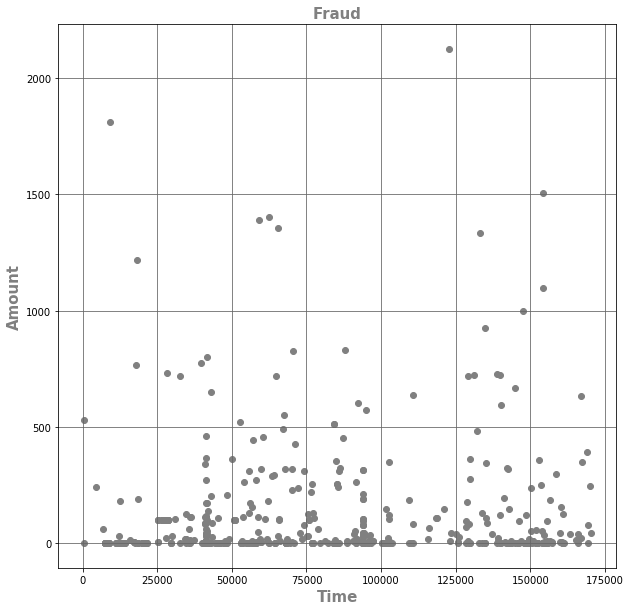

In [18]:
fig, axestime2  = plt.subplots(sharex = True, figsize=(10,10) )

axestime2.scatter(fraud.Time, fraud.Amount, color = 'Grey' )
axestime2.set_title('Fraud', fontweight='bold', fontsize = '15', color = "gray" )

plt.xlabel('Time', fontweight='bold', fontsize = '15', color = "gray")
plt.ylabel('Amount', fontweight='bold', fontsize = '15', color = "gray")

plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.show()

## Different feature classification based on class

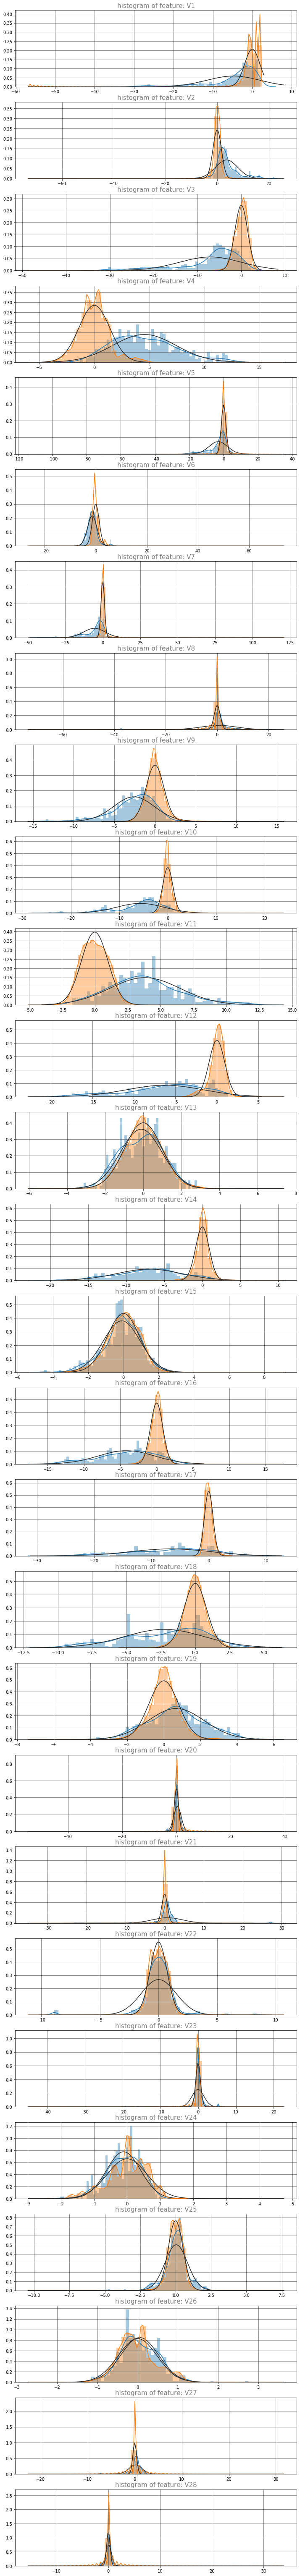

In [19]:
from scipy.stats import norm
col_features = data.iloc[:,1:29].columns
# col_features
bins = 50 

plt.figure( figsize = (12, 28 * 4))
gs = gridspec.GridSpec(28,1)

for count, elem in enumerate(data[col_features]):
    ax = plt.subplot(gs[count])
    sns.distplot(data[elem][data.Class == 1], bins = bins, fit=norm )
    sns.distplot(data[elem][data.Class == 0], bins = bins, fit=norm)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(elem), fontsize = '15', color = "gray" )
    plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.show()


## Data processing
    - Normalizing column amount

In [20]:
scaler = StandardScaler() 

data['normalized_amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['normalized_time'] = scaler.fit_transform(data['Time'].values.reshape(-1,1))


In [21]:
data.normalized_amount.describe()

count    2.848070e+05
mean     3.202236e-16
std      1.000002e+00
min     -3.532294e-01
25%     -3.308401e-01
50%     -2.652715e-01
75%     -4.471707e-02
max      1.023622e+02
Name: normalized_amount, dtype: float64

In [22]:
data.normalized_time.describe()

count    2.848070e+05
mean    -1.050379e-14
std      1.000002e+00
min     -1.996583e+00
25%     -8.552120e-01
50%     -2.131453e-01
75%      9.372174e-01
max      1.642058e+00
Name: normalized_time, dtype: float64

## Droping column amount and time

In [23]:
data = data.drop(['Time','Amount'],axis =1)
data.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,normalized_amount,normalized_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


## separating features and labels

In [24]:
xData = data.iloc[:,data.columns != 'Class'] # feature
xData.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,normalized_amount,normalized_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,-1.996541


In [25]:
print(xData.shape)
print(xData.columns)

(284807, 30)
Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'normalized_amount',
       'normalized_time'],
      dtype='object')


In [26]:
yData = data.iloc[:,data.columns == 'Class']
yData.head(5)

,Class
0,0
1,0
2,0
3,0
4,0


In [27]:
print(yData.shape)
print(yData.columns)

(284807, 1)
Index(['Class'], dtype='object')


## oversampling

In [28]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state= 42)
x_Sampled,y_Sampled = sm.fit_sample(xData,yData.values.ravel())

Source_data_no_fraud_count = len(data[data.Class==0])
Source_data_fraud_count = len(data[data.Class==1])
print('Percentage of fraud counts in original dataset:{}%'.format((Source_data_fraud_count*100)/(Source_data_no_fraud_count+Source_data_fraud_count)))

Sampled_data_no_fraud_count = len(y_Sampled[y_Sampled==0])
Sampled_data_fraud_count = len(y_Sampled[y_Sampled==1])
print('Percentage of fraud counts in the new data:{}%'.format((Sampled_data_fraud_count*100)/(Sampled_data_no_fraud_count+Sampled_data_fraud_count)))

Using TensorFlow backend.


Percentage of fraud counts in original dataset:0.1727485630620034%
Percentage of fraud counts in the new data:50.0%


## Splitting data into train and test set

In [29]:
from sklearn.model_selection import train_test_split

x_Train , x_Test, y_Train, y_Test = train_test_split (xData,yData,test_size=0.2, random_state = 40)

print("Number of train dataset      : ", len(x_Train))
print("Number of test dataset       : ", len(x_Test))
print("Total number of transactions : ", len(x_Train) + len(x_Test))

#undersampled dataset

x_Train_Sampled, x_Test_Sampled, y_Train_Sampled, y_Test_Sampled = train_test_split (x_Sampled, y_Sampled, test_size = 0.2, random_state = 40)
print("\n")
print("Number of train dataset      : ", len(x_Train_Sampled))
print("Number of test dataset       : ", len(x_Test_Sampled))
print("Total number of transactions : ", len(x_Train_Sampled) + len(x_Test_Sampled))


x_train_sampled_data = pd.DataFrame(x_Train_Sampled)
y_train_sampled_data = pd.DataFrame(y_Train_Sampled)
x_test_sampled_data  = pd.DataFrame(x_Test_Sampled)
y_test_sampled_data  = pd.DataFrame(y_Test_Sampled)

Number of train dataset      :  227845
Number of test dataset       :  56962
Total number of transactions :  284807


Number of train dataset      :  454904
Number of test dataset       :  113726
Total number of transactions :  568630


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 

In [31]:
kf = KFold(n_splits=5, shuffle=False).split(range(25))

# print the contents of each training and testing set
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{:^9} {} {:^25}'.format(iteration, data[0], str(data[1])))



Iteration                   Training set observations                   Testing set observations
    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [0 1 2 3 4]       
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [5 6 7 8 9]       
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]     
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]     
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]     


In [32]:
from sklearn.model_selection import cross_val_score
lr = LogisticRegression(solver = 'lbfgs')
lr.fit(x_train_sampled_data, y_train_sampled_data)
yPred=lr.predict(x_test_sampled_data)
scores = cross_val_score(lr, y_test_sampled_data, yPred, cv=10, scoring='accuracy')
print(scores)

C:\Users\Sunil\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.95032094 0.94741933 0.94970544 0.94592456 0.94821067 0.9447815
 0.94846993 0.94521632 0.94917341 0.94512839]


In [33]:
print(scores.mean())

0.947435047815359


In [34]:
y_predicted =  np.array(lr.predict(x_test_sampled_data))
y_right = np.array(y_test_sampled_data)

cnf = confusion_matrix(y_right, y_predicted )
np.set_printoptions(precision=2)
cnf

array([[55612,  1462],
       [ 4516, 52136]], dtype=int64)

In [35]:
from sklearn.metrics import accuracy_score
print ('Accuracy Score :',accuracy_score(y_right, y_predicted)) 

Accuracy Score : 0.9474350632221303


In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_right, y_predicted))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     57074
           1       0.97      0.92      0.95     56652

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726



In [37]:
from sklearn.metrics import precision_recall_curve

precision , recall , thresolds = precision_recall_curve(y_right, y_predicted)

In [38]:
precision    

array([0.5 , 0.97, 1.  ])

In [39]:
recall

array([1.  , 0.92, 0.  ])

In [40]:
thresolds

array([0, 1], dtype=int64)

In [41]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greys):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    else:
        1
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

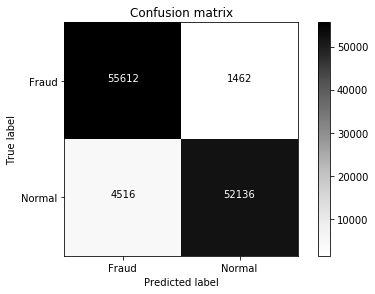

In [42]:
class_names = ['Fraud','Normal']
plt.figure()
plot_confusion_matrix(cnf,classes=class_names,title='Confusion matrix')
plt.show()